In [82]:
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from math import sqrt
from numpy import ndarray
import math
import matplotlib.pyplot as plt

In [83]:
from sklearn.neighbors import KNeighborsClassifier # used only for comparing with the custom implementation

# Algorithms

## Sorting Algorithms

In [84]:
class Sorting:
	@staticmethod
	def arg_sort(seq: list) -> list:
		# return np.argsort(seq)
		return sorted(range(len(seq)), key=seq.__getitem__)

	@staticmethod
	def merge_sort(seq: list) -> list:
		if len(seq) <= 1:
			return seq
		mid = len(seq) // 2
		left = Sorting.merge_sort(seq[:mid])
		right = Sorting.merge_sort(seq[mid:])
		return Sorting.merge(left, right)

	@staticmethod
	def merge(left: list, right: list) -> list:
		result = []
		while len(left) > 0 and len(right) > 0:
			if left[0] <= right[0]:
				result.append(left.pop(0))
			else:
				result.append(right.pop(0))
		if len(left) > 0:
			result.extend(left)
		if len(right) > 0:
			result.extend(right)
		return result

	@staticmethod
	def quick_sort(seq: list) -> list:
		if len(seq) <= 1:
			return seq
		pivot = seq.pop()
		left = []
		right = []
		for item in seq:
			if item <= pivot:
				left.append(item)
			else:
				right.append(item)
		return Sorting.quick_sort(left) + [pivot] + Sorting.quick_sort(right)

	@staticmethod
	def bubble_sort(seq: list) -> list:
		for i in range(len(seq)):
			for j in range(i + 1, len(seq)):
				if seq[i] > seq[j]:
					seq[i], seq[j] = seq[j], seq[i]
		return seq

	@staticmethod
	def selection_sort(seq: list) -> list:
		for i in range(len(seq)):
			min_index = i
			for j in range(i + 1, len(seq)):
				if seq[j] < seq[min_index]:
					min_index = j
			seq[i], seq[min_index] = seq[min_index], seq[i]
		return seq

	@staticmethod
	def insertion_sort(seq: list) -> list:
		for i in range(1, len(seq)):
			j = i
			while j > 0 and seq[j] < seq[j - 1]:
				seq[j], seq[j - 1] = seq[j - 1], seq[j]
				j -= 1
		return seq

	@staticmethod
	def heap_sort(seq: list) -> list:
		heap = []
		for item in seq:
			heap.append(item)
			Sorting.sift_up(heap, len(heap) - 1)
		result = []
		while len(heap) > 0:
			result.append(heap[0])
			heap[0] = heap[-1]
			heap.pop()
			Sorting.sift_down(heap, 0)
		return result	

	@staticmethod
	def sift_up(heap: list, index: int) -> None:
		while index > 0:
			parent = (index - 1) // 2
			if heap[parent] < heap[index]:
				heap[parent], heap[index] = heap[index], heap[parent]
				index = parent
			else:
				break

	@staticmethod
	def sift_down(heap: list, index: int) -> None:
		while 2 * index + 1 < len(heap):
			left = 2 * index + 1
			right = 2 * index + 2
			child = left
			if right < len(heap) and heap[right] > heap[left]:
				child = right
			if heap[index] < heap[child]:
				heap[index], heap[child] = heap[child], heap[index]
				index = child
			else:
				break

	@staticmethod
	def arg_partition(seq: list) -> list:
		return np.argpartition(seq, 0)

## Nearest Neighbour Algorithms

### 1-Nearest Neighbour

In [85]:
class One_Nearest_Neighbours:
	def __init__(self):
		self.k: int = 1
		self.X_train: list = None
		self.y_train: list = None

	def fit(self, X_train: list, y_train: list) -> None:
		self.X_train = X_train
		self.y_train = y_train

	def predict(self, X_test: list) -> list[int]:
		predictions: list = []
		for index, element in enumerate(X_test):
			predictions.append(self._predict(element))
		return predictions
	
	def _predict(self, x_test: list) -> int:
		distances: list = self.distance(self.X_train, x_test)
		k_indices: list = self.sort(distances, "arg_sort")[:self.k]
		k_nearest_labels: list = [self.y_train[i] for i in k_indices]
		most_common: list[tuple] = Counter(k_nearest_labels).most_common(1)
		return most_common[0][0]

	def score(self, X_test: list, y_test: list) -> float:
		predictions: list = self.predict(X_test)
		return self.accuracy_score(y_test, predictions)

	def accuracy_score(self, y_test, y_pred) -> float:
		accuracy: float = sum(y_test == y_pred) / len(y_test)
		return accuracy

	def distance(self, x1: list, x2: list) -> list[float]:
		return [((sum((x1 - x2)**2)) ** 0.5) for (x1) in (self.X_train)]

	def sort(self, distances, sorting_type = "arg_sort"):
		if sorting_type == "arg_sort":
			return Sorting.arg_sort(distances)
		elif sorting_type == "merge_sort":
			return Sorting.merge_sort(distances)
		elif sorting_type == "quick_sort":
			return Sorting.quick_sort(distances)

### 3-Nearest Neighbours

In [86]:
class Three_Nearest_Neighbours:
	def __init__(self):
		self.k: int = 3
		self.X_train: list = None
		self.y_train: list = None

	def fit(self, X_train: list, y_train: list) -> None:
		self.X_train = X_train
		self.y_train = y_train

	def predict(self, X_test: list) -> list[int]:
		predictions: list = []
		for index, element in enumerate(X_test):
			predictions.append(self._predict(element))
		return predictions
	
	def _predict(self, x_test: list) -> int:
		distances: list = self.distance(self.X_train, x_test)
		k_indices: list = self.sort(distances, "arg_sort")[:self.k]
		k_nearest_labels: list = [self.y_train[i] for i in k_indices]
		most_common: list[tuple] = Counter(k_nearest_labels).most_common(1)
		return most_common[0][0]

	def score(self, X_test: list, y_test: list) -> float:
		predictions: list = self.predict(X_test)
		return self.accuracy_score(y_test, predictions)

	def accuracy_score(self, y_test, y_pred) -> float:
		accuracy: float = sum(y_test == y_pred) / len(y_test)
		return accuracy

	def distance(self, x1: list, x2: list) -> list[float]:
		return [((sum((x1 - x2)**2)) ** 0.5) for (x1) in (self.X_train)]

	def sort(self, distances, sorting_type = "arg_sort"):
		if sorting_type == "arg_sort":
			return Sorting.arg_sort(distances)
		elif sorting_type == "merge_sort":
			return Sorting.merge_sort(distances)
		elif sorting_type == "quick_sort":
			return Sorting.quick_sort(distances)

### K-Nearest Neighbour

In [87]:
class K_Nearest_Neighbours:
	def __init__(self, k: int):
		self.k: int = k
		self.X_train: list = None
		self.y_train: list = None

	def fit(self, X_train: list, y_train: list) -> None:
		self.X_train = X_train
		self.y_train = y_train

	def predict(self, X_test: list) -> list[int]:
		predictions: list = []
		for index, element in enumerate(X_test):
			predictions.append(self._predict(element))
		return predictions
	
	def _predict(self, x_test: list) -> int:
		distances: list = self.distance(self.X_train, x_test)
		k_indices: list = self.sort(distances, "arg_sort")[:self.k]
		k_nearest_labels: list = [self.y_train[i] for i in k_indices]
		most_common: list[tuple] = Counter(k_nearest_labels).most_common(1)
		return most_common[0][0]

	def score(self, X_test: list, y_test: list) -> float:
		predictions: list = self.predict(X_test)
		return self.accuracy_score(y_test, predictions)

	def accuracy_score(self, y_test, y_pred) -> float:
		accuracy: float = sum(y_test == y_pred) / len(y_test)
		return accuracy

	def distance(self, x1: list, x2: list) -> list[float]:
		return [((sum((x1 - x2)**2)) ** 0.5) for (x1) in (self.X_train)]

	def sort(self, distances, sorting_type = "arg_sort"):
		if sorting_type == "arg_sort":
			return Sorting.arg_sort(distances)
		elif sorting_type == "merge_sort":
			return Sorting.merge_sort(distances)
		elif sorting_type == "quick_sort":
			return Sorting.quick_sort(distances)

## Conformal Predictor

In [88]:
def calculate_distance(X_train: list, y_train: list) -> tuple[list[float]]:
    train_length: int = X_train.shape[0]
    same_class_dist, other_class_dist = [[math.inf for i in range(train_length)] for j in range(2)]

    for i in range(train_length-1):
        for j in range(i+1, train_length):
            dist = np.sqrt(np.sum((X_train[i] - X_train[j])**2))
            if y_train[i] == y_train[j]:
                if dist < same_class_dist[i]:
                    same_class_dist[i] = dist
                if dist < same_class_dist[j]:
                    same_class_dist[j] = dist
            else:
                if dist < other_class_dist[i]:
                    other_class_dist[i] = dist
                if dist < other_class_dist[j]:
                    other_class_dist[j] = dist
    return same_class_dist, other_class_dist

def calculate_p_value(same_class_dist: list[float], other_class_dist: list[float]) -> list[float]:
    p_values: list[float] = [] 
    for element_same, element_other in zip(same_class_dist, other_class_dist):
        p_values.append(element_same / (element_other + element_same))
    return p_values

def calculate_alpha(p_values: list[float], alpha: float) -> float:
    p_values.sort()
    return p_values[int(len(p_values) * alpha)]

def calculate_conformal_prediction(X_train: list, y_train: list, X_test: list, alpha: float) -> list[bool]:
    same_class_dist, other_class_dist = calculate_distance(X_train, y_train)
    p_values: list[float] = calculate_p_value(same_class_dist, other_class_dist)
    alpha: float = calculate_alpha(p_values, alpha)
    predictions: list[bool] = []
    for i in range(len(X_test)):
        dist = np.sqrt(np.sum((X_train - X_test[i])**2))
        p_values = dist / (dist + other_class_dist)
        predictions.append(p_values > alpha)
    return predictions

def error_rate(y_test: list, predictions: list) -> float:
    return sum(y_test != predictions) / len(y_test)

# Useful Functions

In [89]:
def print_dataset_properties(predictions: list, accuracy: float, compare: DataFrame) -> None:
	print("Predictions: ", predictions)
	print("Accuracy: ", accuracy)
	print("Error Rate: ", 1 - accuracy)
	print("Compare: ", compare)

In [90]:
def compare_lists(list_1: list, list_2: list) -> bool:
	compare: bool = True
	for custom, scikit in zip(list_1, list_2):
		compare = (custom == scikit)
		if not compare:
			break
	return compare

In [91]:
def mean(lst: list[int, float]) -> float:
	return sum(lst) / len(lst)


# Datasets

## Iris

### Loading Dataset

In [92]:
iris = load_iris()

### Splitting Dataset

In [93]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris['data'], iris['target'], random_state=2022) # 75% training and 25% test 

### Checking Dataset

In [94]:
print("Iris Training Set Features Size: ", X_train_iris.shape)
print("Iris Training Set Labels Size:   ", y_train_iris.shape)
print("Iris Testing Set Features Size:  ", X_test_iris.shape)
print("Iris Testing Set Labels Size:    ", y_test_iris.shape)

Iris Training Set Features Size:  (112, 4)
Iris Training Set Labels Size:    (112,)
Iris Testing Set Features Size:   (38, 4)
Iris Testing Set Labels Size:     (38,)


In [95]:
print(X_train_iris)
print(y_train_iris)

[[5.1 3.8 1.9 0.4]
 [5.2 2.7 3.9 1.4]
 [6.5 3.  5.2 2. ]
 [5.6 3.  4.5 1.5]
 [4.9 2.4 3.3 1. ]
 [7.3 2.9 6.3 1.8]
 [6.9 3.1 5.4 2.1]
 [6.3 3.4 5.6 2.4]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [6.  2.9 4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [6.7 3.1 5.6 2.4]
 [6.4 2.8 5.6 2.2]
 [4.6 3.6 1.  0.2]
 [7.  3.2 4.7 1.4]
 [5.4 3.  4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.  1.3]
 [5.  3.2 1.2 0.2]
 [5.  3.5 1.3 0.3]
 [5.7 2.8 4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [5.  2.  3.5 1. ]
 [7.7 3.8 6.7 2.2]
 [6.7 3.  5.2 2.3]
 [6.7 3.1 4.7 1.5]
 [6.1 2.8 4.7 1.2]
 [7.2 3.6 6.1 2.5]
 [5.  3.  1.6 0.2]
 [5.4 3.7 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [6.  2.2 4.  1. ]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.  3.4 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [5.4 3.4 1.5 0.4]
 [6.1 3.  4.9 1.8]
 [5.9 3.2 4.8 1.8]
 [4.9 3.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [5.  3.3 1.4 0.2]
 [4.6 3.2 1.4 0.2]
 [6.5 3.  5.8 2.2]
 [4.7 3.2 1.6 0.2]
 [6.9 3.1 5.1 2.3]
 [6.4 3.2 4.5 1.5]
 [6.3 2.7 4.

### Checking Nearest Neighbours Algorithms

#### K-Nearest Neighbours 

##### `K = 3`

In [96]:
k_nearest_neighbour_iris: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

In [97]:
predictions_iris: list = k_nearest_neighbour_iris.predict(X_test_iris)
compare_iris: DataFrame = pd.DataFrame({'True Labels': y_test_iris, 'Predicted Labels': predictions_iris})
accuracy_iris: float = k_nearest_neighbour_iris.score(X_test_iris, y_test_iris)
error_rate_iris: float = 1 - accuracy_iris

In [98]:
print_dataset_properties(predictions_iris, accuracy_iris, compare_iris)

Predictions:  [2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]
Accuracy:  0.9736842105263158
Error Rate:  0.02631578947368418
Compare:      True Labels  Predicted Labels
0             2                 2
1             2                 2
2             0                 0
3             2                 2
4             0                 0
5             0                 0
6             1                 1
7             1                 1
8             0                 0
9             1                 1
10            1                 1
11            2                 2
12            1                 1
13            2                 2
14            2                 2
15            0                 0
16            1                 1
17            2                 2
18            2                 2
19            1                 1
20            0                 0
21            0                 0
22            2 

##### `K = 1`

In [99]:
k_nearest_neighbour_iris: K_Nearest_Neighbours = K_Nearest_Neighbours(k=1)
k_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

In [100]:
predictions_iris_k: list = k_nearest_neighbour_iris.predict(X_test_iris)
compare_iris_k: DataFrame = pd.DataFrame({'True Labels': y_test_iris, 'Predicted Labels': predictions_iris_k})
accuracy_iris_k: float = k_nearest_neighbour_iris.score(X_test_iris, y_test_iris)
error_rate_iris_k: float = 1 - accuracy_iris_k

In [101]:
print_dataset_properties(predictions_iris_k, accuracy_iris_k, compare_iris_k)

Predictions:  [2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]
Accuracy:  0.9736842105263158
Error Rate:  0.02631578947368418
Compare:      True Labels  Predicted Labels
0             2                 2
1             2                 2
2             0                 0
3             2                 2
4             0                 0
5             0                 0
6             1                 1
7             1                 1
8             0                 0
9             1                 1
10            1                 1
11            2                 2
12            1                 1
13            2                 2
14            2                 2
15            0                 0
16            1                 1
17            2                 2
18            2                 2
19            1                 1
20            0                 0
21            0                 0
22            2 

In [102]:
del k_nearest_neighbour_iris, predictions_iris, compare_iris, accuracy_iris, error_rate_iris

#### 1-Nearest Neighbour

In [103]:
one_nearest_neighbour_iris: One_Nearest_Neighbours = One_Nearest_Neighbours()
one_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

In [104]:
predictions_iris: list = one_nearest_neighbour_iris.predict(X_test_iris)
compare_iris: DataFrame = pd.DataFrame({'True Labels': y_test_iris, 'Predicted Labels': predictions_iris})
accuracy_iris: float = one_nearest_neighbour_iris.score(X_test_iris, y_test_iris)
error_rate_iris: float = 1 - accuracy_iris

In [105]:
print_dataset_properties(predictions_iris, accuracy_iris, compare_iris)

Predictions:  [2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]
Accuracy:  0.9736842105263158
Error Rate:  0.02631578947368418
Compare:      True Labels  Predicted Labels
0             2                 2
1             2                 2
2             0                 0
3             2                 2
4             0                 0
5             0                 0
6             1                 1
7             1                 1
8             0                 0
9             1                 1
10            1                 1
11            2                 2
12            1                 1
13            2                 2
14            2                 2
15            0                 0
16            1                 1
17            2                 2
18            2                 2
19            1                 1
20            0                 0
21            0                 0
22            2 

In [106]:
del one_nearest_neighbour_iris, predictions_iris, compare_iris, accuracy_iris, error_rate_iris

#### 3-Nearest Neighbours

In [107]:
three_nearest_neighbours_iris: Three_Nearest_Neighbours = Three_Nearest_Neighbours()
three_nearest_neighbours_iris.fit(X_train_iris, y_train_iris)

In [108]:
predictions_iris: list = three_nearest_neighbours_iris.predict(X_test_iris)
compare_iris: DataFrame = pd.DataFrame({'True Labels': y_test_iris, 'Predicted Labels': predictions_iris})
accuracy_iris: float = three_nearest_neighbours_iris.score(X_test_iris, y_test_iris)
error_rate_iris: float = 1 - accuracy_iris

In [109]:
print_dataset_properties(predictions_iris, accuracy_iris, compare_iris)

Predictions:  [2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]
Accuracy:  0.9736842105263158
Error Rate:  0.02631578947368418
Compare:      True Labels  Predicted Labels
0             2                 2
1             2                 2
2             0                 0
3             2                 2
4             0                 0
5             0                 0
6             1                 1
7             1                 1
8             0                 0
9             1                 1
10            1                 1
11            2                 2
12            1                 1
13            2                 2
14            2                 2
15            0                 0
16            1                 1
17            2                 2
18            2                 2
19            1                 1
20            0                 0
21            0                 0
22            2 

In [110]:
del three_nearest_neighbours_iris, predictions_iris, compare_iris, accuracy_iris, error_rate_iris

### Comparing Nearest Neighbours Algorithms

#### K-Nearest Neighbour (`k = 1`) vs 1-Nearest Neighbour

In [111]:
k_nearest_neighbour_iris: K_Nearest_Neighbours = K_Nearest_Neighbours(k=1)
k_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

predictions_iris_k: list = k_nearest_neighbour_iris.predict(X_test_iris)
accuracy_iris_k: float = k_nearest_neighbour_iris.score(X_test_iris, y_test_iris)

In [112]:
one_nearest_neighbour_iris: One_Nearest_Neighbours = One_Nearest_Neighbours()
one_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

predictions_iris_1: list = one_nearest_neighbour_iris.predict(X_test_iris)
accuracy_iris_1: float = one_nearest_neighbour_iris.score(X_test_iris, y_test_iris)

In [113]:
print("Predictions: ", predictions_iris_k == predictions_iris_1)
print("Accuracy: ", accuracy_iris_k == accuracy_iris_1)

Predictions:  True
Accuracy:  True


In [114]:
del k_nearest_neighbour_iris, predictions_iris_k, accuracy_iris_k, one_nearest_neighbour_iris, predictions_iris_1, accuracy_iris_1

#### K-Nearest Neighbour (`k = 3`) vs 3-Nearest Neighbour

In [115]:
k_nearest_neighbour_iris: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

predictions_iris_k: list = k_nearest_neighbour_iris.predict(X_test_iris)
accuracy_iris_k: float = k_nearest_neighbour_iris.score(X_test_iris, y_test_iris)

In [116]:
three_nearest_neighbour_iris: Three_Nearest_Neighbours = Three_Nearest_Neighbours()
three_nearest_neighbour_iris.fit(X_train_iris, y_train_iris)

predictions_iris_3: list = three_nearest_neighbour_iris.predict(X_test_iris)
accuracy_iris_3: float = three_nearest_neighbour_iris.score(X_test_iris, y_test_iris)

In [117]:
print("Predictions: ", predictions_iris_k == predictions_iris_3)
print("Accuracy: ", accuracy_iris_k == accuracy_iris_3)

Predictions:  True
Accuracy:  True


In [118]:
del k_nearest_neighbour_iris, predictions_iris_k, accuracy_iris_k, three_nearest_neighbour_iris, predictions_iris_3, accuracy_iris_3

#### Comparing Custom K-Nearest Neighbour Algorithm to `scikit` Built-In Implementation

In [119]:
k_nearest_neighbour_scikit = KNeighborsClassifier(n_neighbors=1) 
k_nearest_neighbour_scikit.fit(X_train_iris, y_train_iris)

prediction_iris_scikit = k_nearest_neighbour_scikit.predict(X_test_iris)
accuracy_iris_scikit = k_nearest_neighbour_scikit.score(X_test_iris, y_test_iris)

In [120]:
k_nearest_neighbour_iris_custom: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_iris_custom.fit(X_train_iris, y_train_iris)

predictions_iris_custom: list = k_nearest_neighbour_iris_custom.predict(X_test_iris)
accuracy_iris_custom: float = k_nearest_neighbour_iris_custom.score(X_test_iris, y_test_iris)

In [121]:
print("Predictions: ", compare_lists(prediction_iris_scikit, predictions_iris_custom))
print("Accuracy: ", accuracy_iris_scikit == accuracy_iris_custom)

Predictions:  True
Accuracy:  True


In [122]:
del k_nearest_neighbour_scikit, prediction_iris_scikit, accuracy_iris_scikit, k_nearest_neighbour_iris_custom, predictions_iris_custom, accuracy_iris_custom

### Conformal Prediction

In [123]:
same_class_dist, other_class_dist = calculate_distance(X_train_iris, y_train_iris)
p_values: list[float] = calculate_p_value(same_class_dist, other_class_dist)
conformal_prediction_iris: list[bool] = calculate_conformal_prediction(X_train_iris, y_train_iris, X_test_iris, 0.05)
alpha: float = calculate_alpha(p_values, 0.05)
conformal_prediction_iris_alpha: list[bool] = calculate_conformal_prediction(X_train_iris, y_train_iris, X_test_iris, alpha)

In [124]:
print("Average p-value: ", np.mean(p_values))
print("Average false p-value for `alpha = 0.05` iris dataset: ", alpha)
print("Conformal prediction: ", np.mean(conformal_prediction_iris))
print("Conformal prediction for `alpha = 0.05` iris dataset: ", np.mean(conformal_prediction_iris_alpha))

Average p-value:  0.22701569783776976
Average false p-value for `alpha = 0.05` iris dataset:  0.06192235189296758
Conformal prediction:  1.0
Conformal prediction for `alpha = 0.05` iris dataset:  1.0


In [125]:
del same_class_dist, other_class_dist, p_values, conformal_prediction_iris, alpha, conformal_prediction_iris_alpha

## Ionosphere

### Loading Dataset

In [126]:
X_ionosphere = np.genfromtxt("ionosphere.txt", delimiter=',', dtype='int') 
X_ionosphere = X_ionosphere[:, :-1] 
y_ionosphere = np.genfromtxt("ionosphere.txt", delimiter=',', dtype='int')
y_ionosphere = y_ionosphere[:, -1]

### Splitting Dataset

In [127]:
X_train_ionosphere, X_test_ionosphere, y_train_ionosphere, y_test_ionosphere = train_test_split(X_ionosphere, y_ionosphere, random_state=2022)

### Checking Dataset

In [128]:
print("Iris Training Set Features Size: ", X_ionosphere.shape)
print("Iris Training Set Labels Size:   ", y_ionosphere.shape)

Iris Training Set Features Size:  (351, 34)
Iris Training Set Labels Size:    (351,)


In [129]:
print(X_ionosphere)
print(y_ionosphere)

[[ 1  0 -1 ... -1 -1 -1]
 [ 1  0  1 ... -1 -1 -1]
 [ 1  0  1 ... -1 -1 -1]
 ...
 [ 1  0 -1 ... -1 -1 -1]
 [ 1  0 -1 ... -1 -1 -1]
 [ 1  0 -1 ... -1 -1 -1]]
[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  

### Checking Nearest Neighbours Algorithms

#### K-Nearest Neighbours

In [130]:
k_nearest_neighbour_ionosphere: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_ionosphere.fit(X_ionosphere, y_ionosphere)
predictions_ionosphere: list = k_nearest_neighbour_ionosphere.predict(X_ionosphere)
compare_ionosphere: DataFrame = pd.DataFrame({'True Labels': y_ionosphere, 'Predicted Labels': predictions_ionosphere})
accuracy_ionosphere: float = k_nearest_neighbour_ionosphere.score(X_ionosphere, y_ionosphere)
error_rate_ionosphere: float = 1 - accuracy_ionosphere

In [131]:
print_dataset_properties(predictions_ionosphere, accuracy_ionosphere, compare_ionosphere)

Predictions:  [1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [132]:
del k_nearest_neighbour_ionosphere, predictions_ionosphere, compare_ionosphere, accuracy_ionosphere, error_rate_ionosphere

#### 1 Nearest Neighbour

In [133]:
one_nearest_neighbour_ionosphere: One_Nearest_Neighbours = One_Nearest_Neighbours()
one_nearest_neighbour_ionosphere.fit(X_ionosphere, y_ionosphere)
predictions_ionosphere: list = one_nearest_neighbour_ionosphere.predict(X_ionosphere)
compare_ionosphere = pd.DataFrame({'True Labels': y_ionosphere, 'Predicted Labels': predictions_ionosphere})
accuracy_ionosphere: float = one_nearest_neighbour_ionosphere.score(X_ionosphere, y_ionosphere)
error_rate_ionosphere: float = 1 - accuracy_ionosphere

In [134]:
print_dataset_properties(predictions_ionosphere, accuracy_ionosphere, compare_ionosphere)

Predictions:  [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [135]:
del one_nearest_neighbour_ionosphere, predictions_ionosphere, compare_ionosphere, accuracy_ionosphere, error_rate_ionosphere

#### 3 Nearest Neighbour

In [136]:
three_nearest_neighbours_ionosphere: Three_Nearest_Neighbours = Three_Nearest_Neighbours()
three_nearest_neighbours_ionosphere.fit(X_ionosphere, y_ionosphere)
predictions_ionosphere: list = three_nearest_neighbours_ionosphere.predict(X_ionosphere)
compare_ionosphere: DataFrame = pd.DataFrame({'True Labels': y_ionosphere, 'Predicted Labels': predictions_ionosphere})
accuracy_ionosphere: float = three_nearest_neighbours_ionosphere.score(X_ionosphere, y_ionosphere)
error_rate_ionosphere: float = 1 - accuracy_ionosphere

In [137]:
print_dataset_properties(predictions_ionosphere, accuracy_ionosphere, compare_ionosphere)

Predictions:  [1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [138]:
del three_nearest_neighbours_ionosphere, predictions_ionosphere, compare_ionosphere, accuracy_ionosphere, error_rate_ionosphere

### Comparing Nearest Neighbour Algorithms

#### K-Nearest Neighbour (`k = 1`) vs 1-Nearest Neighbour 

In [139]:
k_nearest_neighbour_ionosphere: K_Nearest_Neighbours = K_Nearest_Neighbours(k=1)
k_nearest_neighbour_ionosphere.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_k: list = k_nearest_neighbour_ionosphere.predict(X_test_ionosphere)
accuracy_iris_k: float = k_nearest_neighbour_ionosphere.score(X_test_ionosphere, y_test_ionosphere)

In [140]:
one_nearest_neighbour_ionosphere: One_Nearest_Neighbours = One_Nearest_Neighbours()
one_nearest_neighbour_ionosphere.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_1: list = one_nearest_neighbour_ionosphere.predict(X_test_ionosphere)
accuracy_ionosphere_1: float = one_nearest_neighbour_ionosphere.score(X_test_ionosphere, y_test_ionosphere)

In [141]:
print("Predictions: ", compare_lists(predictions_ionosphere_k, predictions_ionosphere_1))
print("Accuracy: ", accuracy_iris_k == accuracy_ionosphere_1)

Predictions:  True
Accuracy:  True


In [142]:
del k_nearest_neighbour_ionosphere, predictions_ionosphere_k, accuracy_iris_k, one_nearest_neighbour_ionosphere, predictions_ionosphere_1, accuracy_ionosphere_1

#### K-Nearest Neighbour (`k = 3`) vs 3-Nearest Neighbour

In [143]:
k_nearest_neighbour_ionosphere: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_ionosphere.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_k: list = k_nearest_neighbour_ionosphere.predict(X_test_ionosphere)
accuracy_iris_k: float = k_nearest_neighbour_ionosphere.score(X_test_ionosphere, y_test_ionosphere)

In [144]:
three_nearest_neighbours_ionosphere: Three_Nearest_Neighbours = Three_Nearest_Neighbours()
three_nearest_neighbours_ionosphere.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_3: list = three_nearest_neighbours_ionosphere.predict(X_test_ionosphere)
accuracy_ionosphere_3: float = three_nearest_neighbours_ionosphere.score(X_test_ionosphere, y_test_ionosphere)

In [145]:
print("Predictions: ", compare_lists(predictions_ionosphere_k, predictions_ionosphere_3))
print("Accuracy: ", accuracy_iris_k == accuracy_ionosphere_3)

Predictions:  True
Accuracy:  True


In [146]:
del k_nearest_neighbour_ionosphere, predictions_ionosphere_k, accuracy_iris_k, three_nearest_neighbours_ionosphere, predictions_ionosphere_3, accuracy_ionosphere_3

#### Comparing Custom K-Nearest Neighbour Algorithm to `scikit` Built-In Implementation

In [147]:
k_nearest_neighbour_ionosphere_scikit: KNeighborsClassifier = KNeighborsClassifier(n_neighbors=3)
k_nearest_neighbour_ionosphere_scikit.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_scikit: list = k_nearest_neighbour_ionosphere_scikit.predict(X_test_ionosphere)
accuracy_ionosphere_scikit: float = k_nearest_neighbour_ionosphere_scikit.score(X_test_ionosphere, y_test_ionosphere)

In [148]:
k_nearest_neighbour_ionosphere_custom: K_Nearest_Neighbours = K_Nearest_Neighbours(k=3)
k_nearest_neighbour_ionosphere_custom.fit(X_train_ionosphere, y_train_ionosphere)

predictions_ionosphere_custom: list = k_nearest_neighbour_ionosphere_custom.predict(X_test_ionosphere)
accuracy_ionosphere_custom: float = k_nearest_neighbour_ionosphere_custom.score(X_test_ionosphere, y_test_ionosphere)

In [149]:
print("Predictions: ", compare_lists(predictions_ionosphere_scikit, predictions_ionosphere_custom))
print("Accuracy: ", accuracy_ionosphere_scikit == accuracy_ionosphere_custom)

Predictions:  True
Accuracy:  True


In [150]:
del k_nearest_neighbour_ionosphere_scikit, predictions_ionosphere_scikit, accuracy_ionosphere_scikit, k_nearest_neighbour_ionosphere_custom, predictions_ionosphere_custom, accuracy_ionosphere_custom

### Conformal Prediction

In [151]:
same_class_dist, other_class_dist = calculate_distance(X_train_ionosphere, y_train_ionosphere)
p_values: list[float] = calculate_p_value(same_class_dist, other_class_dist)
conformal_prediction_iris: list[bool] = calculate_conformal_prediction(X_train_ionosphere, y_train_ionosphere, X_test_ionosphere, 0.05)
alpha: float = calculate_alpha(p_values, 0.05)
conformal_prediction_iris_alpha: list[bool] = calculate_conformal_prediction(X_train_ionosphere, y_train_ionosphere, X_test_ionosphere, alpha)

/tmp/ipykernel_77768/2625238511.py:23: RuntimeWarning: invalid value encountered in double_scalars
  p_values.append(element_same / (element_other + element_same))


In [152]:
print("Average p-value: ", np.mean(p_values))
print("Average false p-value for `alpha = 0.05` iris dataset: ", alpha)
print("Conformal prediction: ", np.mean(conformal_prediction_iris))
print("Conformal prediction for `alpha = 0.05` iris dataset: ", np.mean(conformal_prediction_iris_alpha))

Average p-value:  nan
Average false p-value for `alpha = 0.05` iris dataset:  0.5
Conformal prediction:  1.0
Conformal prediction for `alpha = 0.05` iris dataset:  0.0


# Comparing Sorting Algorithms

In [153]:
import random
import timeit

In [154]:
random_numbers: list[float] = [random.random() for _ in range(100)]

In [155]:
arg_sort: float = timeit.timeit("Sorting.arg_sort(random_numbers.copy())", globals=globals(), number=1000)
merge_sort: float = timeit.timeit("Sorting.merge_sort(random_numbers.copy())", globals=globals(), number=1000)
quick_sort: float = timeit.timeit("Sorting.quick_sort(random_numbers.copy())", globals=globals(), number=1000)
heap_sort: float = timeit.timeit("Sorting.heap_sort(random_numbers.copy())", globals=globals(), number=1000)
bubble_sort: float = timeit.timeit("Sorting.bubble_sort(random_numbers.copy())", globals=globals(), number=1000)
selection_sort: float = timeit.timeit("Sorting.selection_sort(random_numbers.copy())", globals=globals(), number=1000)
insertion_sort: float = timeit.timeit("Sorting.insertion_sort(random_numbers.copy())", globals=globals(), number=1000)
arg_partition: float = timeit.timeit("Sorting.arg_partition(random_numbers.copy())", globals=globals(), number=1000)

In [156]:
print("Arg Sort:\t", arg_sort)
print("Merge Sort:\t", merge_sort)
print("Quick Sort:\t", quick_sort)
print("Heap Sort:\t", heap_sort)
print("Bubble Sort:\t", bubble_sort)
print("Selection Sort:\t", selection_sort)
print("Insertion Sort:\t", insertion_sort)
print("Arg Partition:\t", arg_partition)

Arg Sort:	 0.02424218400119571
Merge Sort:	 0.8567613490013173
Quick Sort:	 0.316780254997866
Heap Sort:	 1.0349149859976023
Bubble Sort:	 2.041292007001175
Selection Sort:	 1.286797533997742
Insertion Sort:	 1.9608707959996536
Arg Partition:	 0.03717840000172146


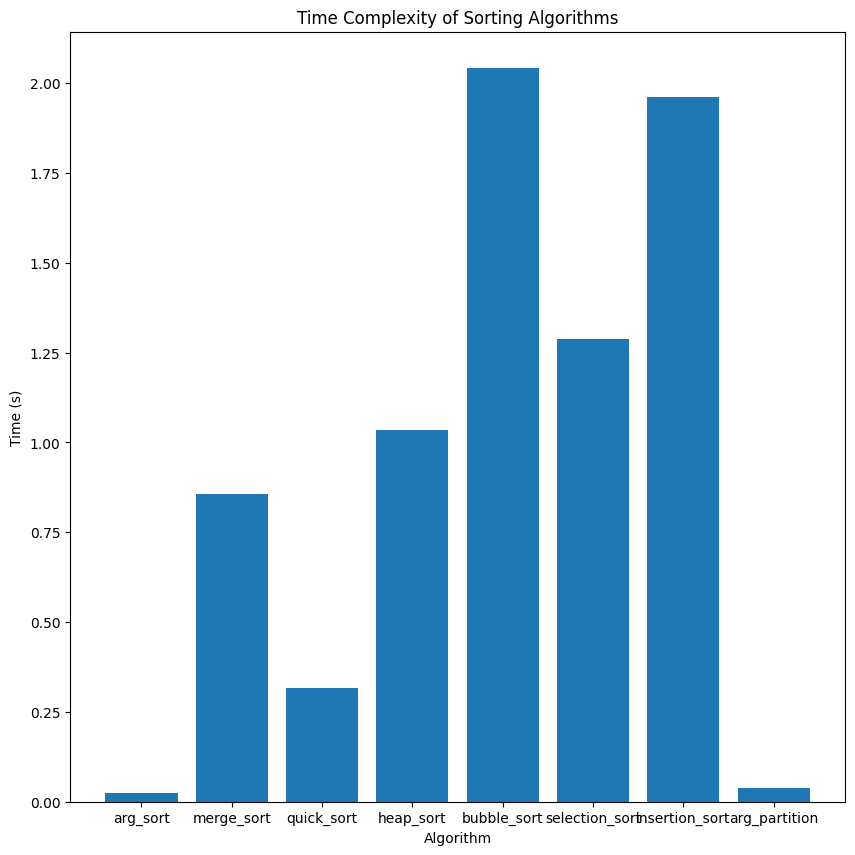

In [157]:
plt.figure(figsize=(10, 10))
plt.title("Time Complexity of Sorting Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Time (s)")
plt.bar(["arg_sort", "merge_sort", "quick_sort", "heap_sort", "bubble_sort", "selection_sort", "insertion_sort", "arg_partition"], [arg_sort, merge_sort, quick_sort, heap_sort, bubble_sort, selection_sort, insertion_sort, arg_partition])
plt.show()